In [1]:
import csv
import pandas as pd
import numpy as np
#from sklearn import
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

## Years to Load

In [17]:
years = [15, 16]

In [18]:
taxi_df = {}
for i in [15,16]:
    taxi_df[i] = pd.read_csv("../dataset_4_02_modified/" + str(i) \
                             + "taxi_with_weather_std.csv",\
                                    sep = ",")
# "2016" and before
# taxi_df[15] = pd.concat([taxi_df[15], taxi_df[16]], axis = 0)\
#               .reset_index().drop(columns = ['index'])

In [19]:
y_df = {}
X_raw_df = {}
for i in years:
    y_df[i] =  pd.DataFrame(taxi_df[i]['Count'])
    X_raw_df[i] = taxi_df[i].drop(columns = ['Pickup Community Area', \
                                             'Count', 'Trip Start Timestamp'])

In [20]:
weekdays = ['0','1','2','3','4','5','6']
enc = OneHotEncoder(categories=[weekdays])

encoded_df = {}
for i in years:
    enc.fit(X_raw_df[i].weekday.values.reshape(-1, 1))
    encoded_df[i] = pd.DataFrame(enc.transform(X_raw_df[i].weekday.values.reshape(-1, 1))\
                                 .toarray().astype(int))\
                                .rename(columns = {0: 'Monday', 1:'Tuesday', 2:'Wedneseday',\
                                3:'Thursday', 4:'Friday', 5:'Saturday',\
                                6:'Sunday'})

In [21]:
X_encode_df = {}
for i in years:
    X_encode_df[i] = pd.concat([X_raw_df[i].drop(columns=['weekday']), encoded_df[i]], axis=1) 

In [22]:
X_mat = {}
y_mat = {}
for i in years:
    X_mat[i] = X_encode_df[i].values
    y_mat[i] = y_df[i].values

In [23]:
reg = LinearRegression().fit(X_mat[15], y_mat[15])

In [24]:
reg.score(X_mat[16], y_mat[16])

0.037370560053785584

# Add 2dg terms for lon and lat

In [25]:
for i in years:
    X_encode_df[i]['lat_sq'] = round(X_encode_df[i].lat.pow(2),4)
    X_encode_df[i]['lon_sq'] = round(X_encode_df[i].lon.pow(2),4)
    X_encode_df[i]['latXlon'] = round(X_encode_df[i].lat*X_encode_df[i].lon, 4)

In [26]:
X_mat = {}
y_mat = {}
for i in years:
    X_mat[i] = X_encode_df[i].values
    y_mat[i] = y_df[i].values

In [27]:
reg2 = LinearRegression().fit(X_mat[15], y_mat[15])

## R^2

In [28]:
reg2.score(X_mat[16], y_mat[16])

0.09900850869034639

## Mean Square Error

In [29]:
reg2_pred16 = reg2.predict(X_mat[16])
mean_squared_error(y_true = y_mat[16], y_pred = reg2_pred16)

12654.082651377037

## Analyze error distribution

(array([3.52381e+05, 3.30110e+04, 2.14900e+03, 2.03000e+03, 1.41000e+03,
        5.56000e+02, 2.00000e+02, 3.30000e+01, 4.00000e+00, 2.00000e+00]),
 array([-147.33164099,   35.07227281,  217.4761866 ,  399.88010039,
         582.28401419,  764.68792798,  947.09184177, 1129.49575557,
        1311.89966936, 1494.30358316, 1676.70749695]),
 <a list of 10 Patch objects>)

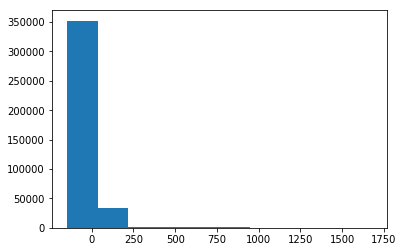

In [16]:
plt.hist(x = (y_mat[17] - reg2_pred17).reshape(1,-1)[0])

## Results
### Original terms: 
#### Train 2016, Test 2017: Test R^2 0.02
### Lon Lat Sq terms: 
#### Train 2016, Test 2017: Test R^2 0.08, Test MSE 7284